In [1]:
metafile="J1646-2142_coherent16.meta"

In [2]:
import ppalign as ppa
import numpy as np

In [3]:
outfile = "abc.port"
ppa.align_archives(metafile=metafile, initial_guess="300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM",
                   tscrunch=True, pscrunch=True, SNR_cutoff=0.0, outfile=outfile, niter=1, quiet=False)

# Initial guess is an initial guess for an average portrait. I used the highest SNR profile for this.
# In this case, J1646-2142f64avgport.port is the average portrait created from the data files listed in the
# metafile. "f64" denotes that the files have been scrunched to have 64 frequency channels

# It is important to note that bad channels zeroed in the GMRT data processing pipeline must be fully zapped
# before being run through this notebook. I created a very simple shell script to do this and f scrunch to 
# a given number of frequency channels. I have only had total functionality with 64 channels. Input files also
# must be in FITS format. The shell script requires PSRCHIVE tools to work.




Initial guess: 300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM.

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity

Doing iteration 1...
FITS file name: 300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_DM.

Reading data from 300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.9514
        bandwidth [MHz]    = 200.0
       

In [4]:
import ppspline as pps
avgport = outfile
dp = pps.DataPortrait(avgport)
dp.normalize_portrait("prof")

# This initializes the portrait be modeled by the spline model later. It is normalized 
# by the average portrait created earlier, so as to clearly model any frequency-dependent
# profile evolution.



Reading data from abc.port on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 0.000000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity



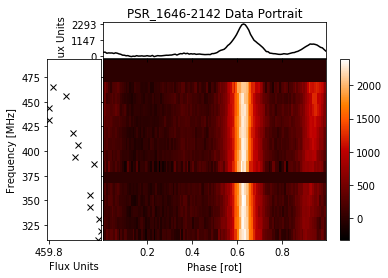

In [5]:
dp.show_data_portrait()

In [6]:
# Mainly set to defaults. SNR cutoffs removed
smooth = True
rchi2_tol = 0.1 #What is this factor
k = 5
sfac = 1.0
max_nbreak = 2

# Setting default arguments for the make_spline_model() seen below. It is important to set
# max_nbreak = None. Otherwise, the spline model will have many breakpoints and not accurately
# model the profile evolution.
dp.make_spline_model(smooth=smooth, rchi2_tol=rchi2_tol, k=k, sfac=sfac,
                    max_nbreak=max_nbreak, model_name=None, quiet=False, snr_cutoff=20.0)
# Creation of spline model. snr_cutoff is default to 150 but tweaking may be needed to
# get 1 - 2 "significant" eigenprofiles. Somewhat arbitrary.


Performing principal component analysis on data with 128 dimensions and 13 measurements...
B-spline interpolation model abc.port.spl uses 1 basis profile components and 2 breakpoints (6 B-splines with k=5).


/home/jroy/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_fitpack_impl.py:296: RuntimeWarning: The spline is weighted least-squares polynomial of degree k.
fp gives the upper bound fp0 for the smoothing factor s	k=5 n=12 m=13 fp=404.112023 s=2948.605171
  (k, len(t), m, fp, s)))


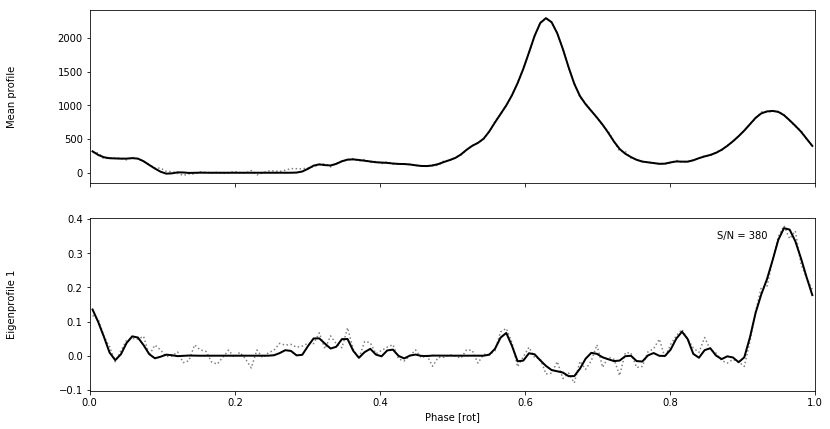

In [7]:
dp.show_eigenprofiles(show_snrs=True)
# Showing average profile and eigenprofile(s)


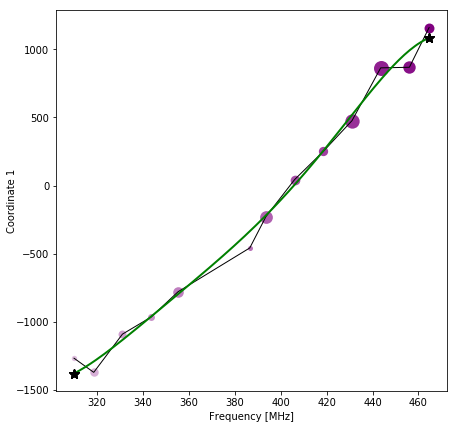

In [8]:
dp.show_spline_curve_projections()
# Shows a projection of how the eigenprofile(s) changes according to frequency and to each other.


In [9]:
J1646_fit_modelfile = "J1646-2142_splinefit.spl"
dp.write_model(J1646_fit_modelfile, quiet=False)

# Writes spline model to a file.


Wrote modelfile J1646-2142_splinefit.spl.



Reading data from 300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.9514
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0281 sec/TOA
Med. TOA error is 3.163 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.9514
  

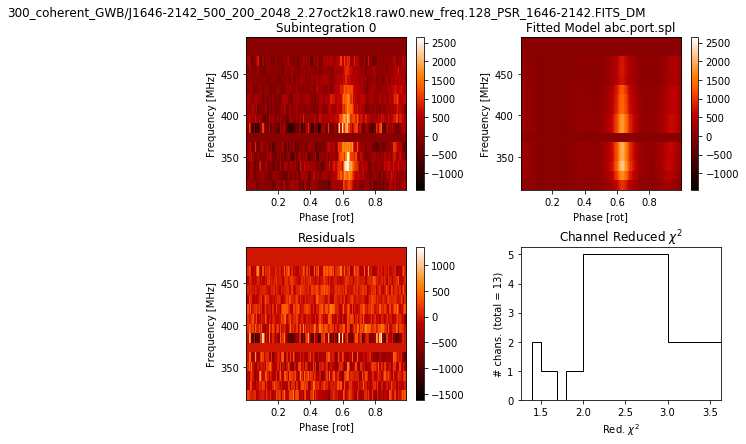


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.25feb2k19.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1499.63 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.25feb2k19.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0400 sec/TOA
Med. TOA error is 2.203 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.25feb2k19.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
     

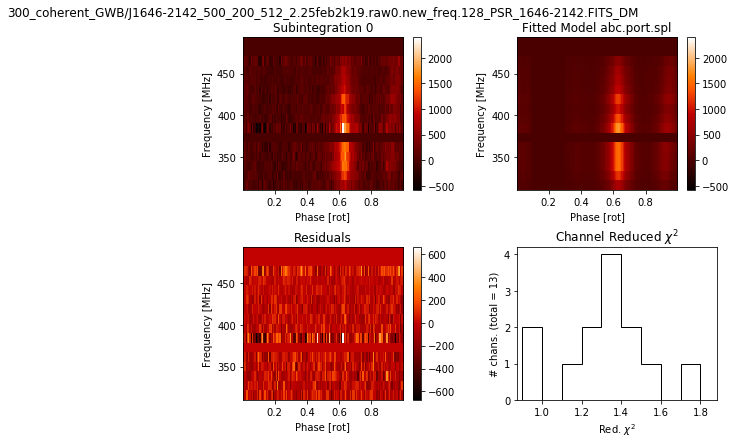


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.14may2k19.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.14may2k19.raw0.new_freq_PSR_1646-2142.FITS_DM
~0.0299 sec/TOA
Med. TOA error is 2.826 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.14may2k19.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth

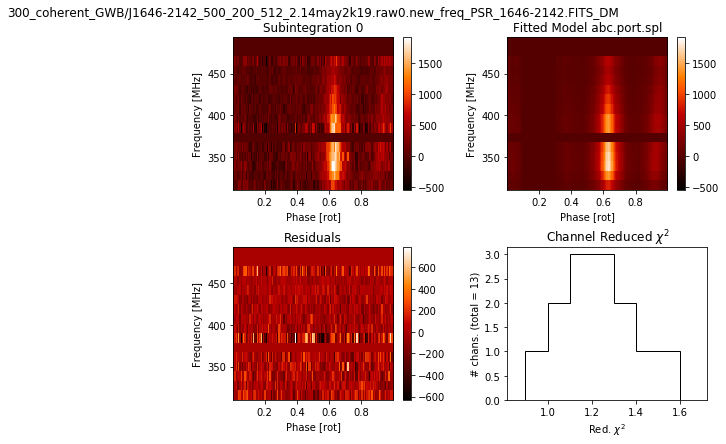


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.3jun2k19.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.3jun2k19.raw0.new_freq_PSR_1646-2142.FITS_DM
~0.0378 sec/TOA
Med. TOA error is 5.084 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.3jun2k19.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [M

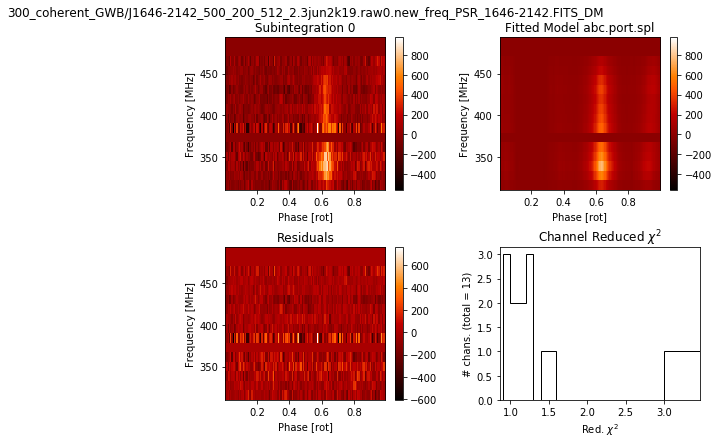


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.24jun2k19.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1070.53 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.24jun2k19.raw0.new_freq_PSR_1646-2142.FITS_DM
~0.0242 sec/TOA
Med. TOA error is 2.894 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.24jun2k19.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth

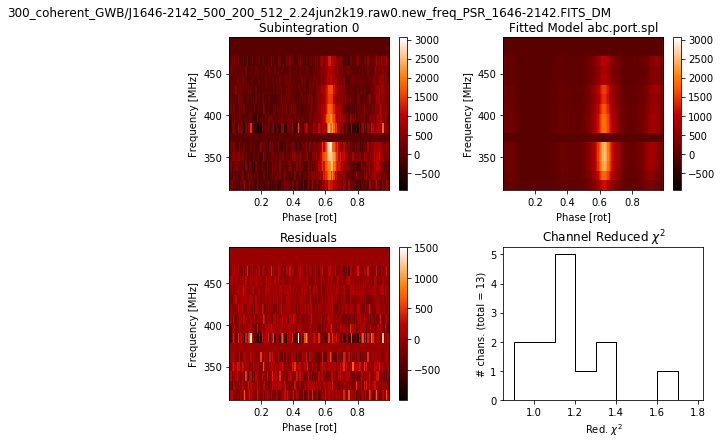


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.15jul2k19.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.15jul2k19.raw0.new_freq_PSR_1646-2142.FITS_DM
~0.0305 sec/TOA
Med. TOA error is 2.123 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.15jul2k19.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth

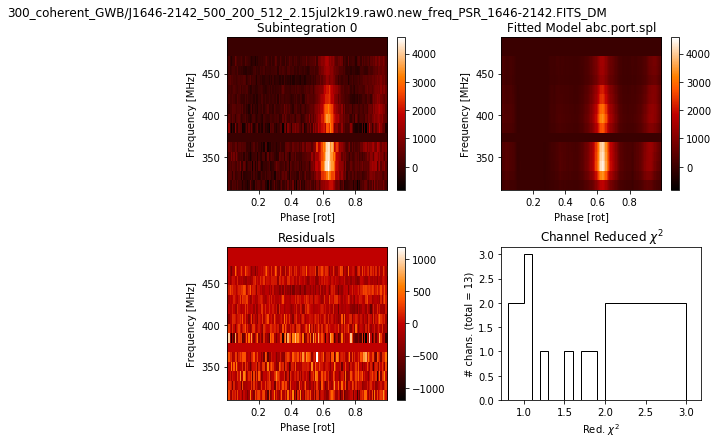


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.8aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2152.86 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.8aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM
~0.0127 sec/TOA
Med. TOA error is 5.142 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.8aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth

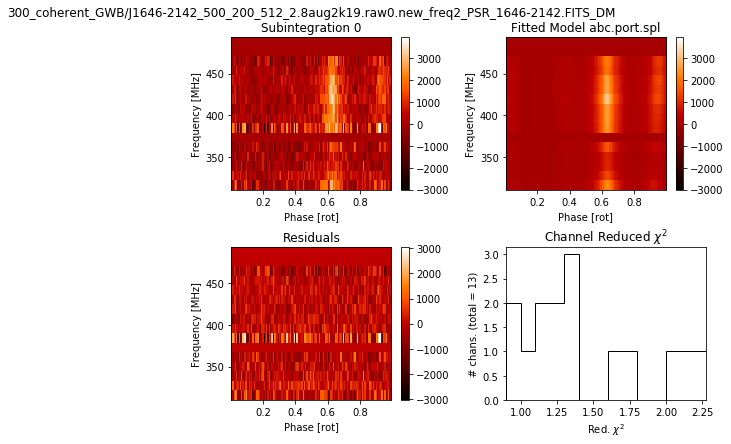


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.22aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM
~0.0337 sec/TOA
Med. TOA error is 2.295 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwi

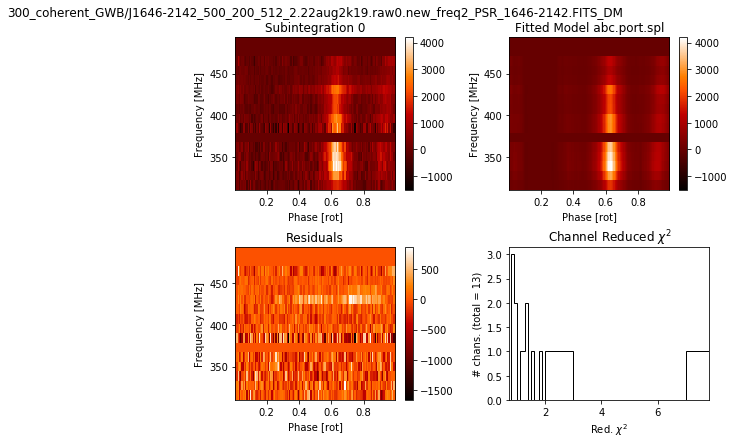


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2sep2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.2sep2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM
~0.0303 sec/TOA
Med. TOA error is 2.788 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2sep2k19.raw0.new_freq2_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth

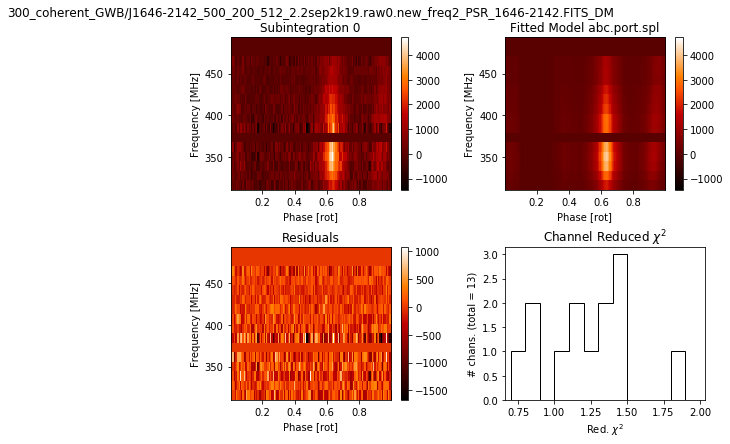


Reading data from 300_coherent_GWB/J1646-2142_500_200_1024_2.2mar2k20.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.9011
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 3435.72 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_1024_2.2mar2k20.raw0.new_freq_PSR_1646-2142.FITS_DM
~0.0215 sec/TOA
Med. TOA error is 4.551 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_1024_2.2mar2k20.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.9011
        bandwidth

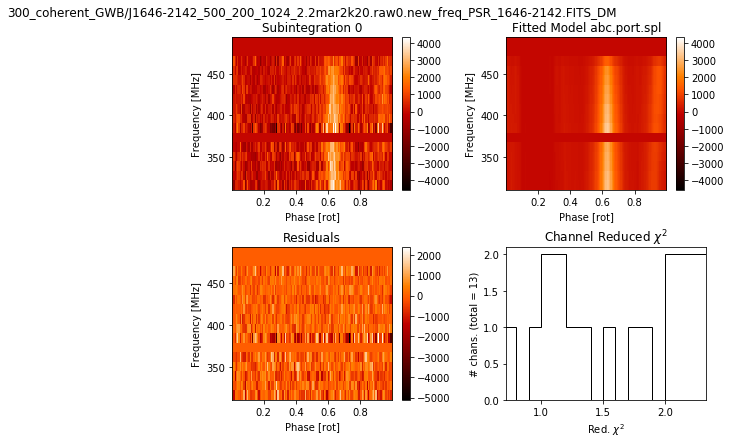


Reading data from 300_coherent_GWB/J1646-2142_500_200_1024_2.16jun2k20.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.9011
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2607.02 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_1024_2.16jun2k20.raw0.new_freq_PSR_1646-2142.FITS_DM
~0.0156 sec/TOA
Med. TOA error is 6.854 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_1024_2.16jun2k20.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.9011
        bandwi

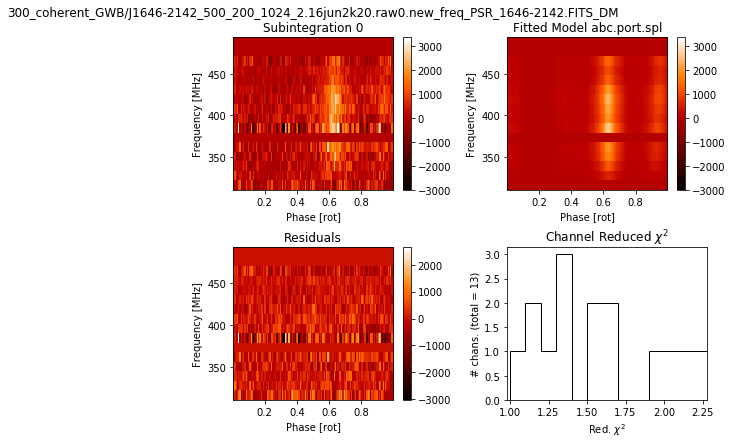


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.4aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2999.26 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.4aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0324 sec/TOA
Med. TOA error is 5.968 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.4aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        

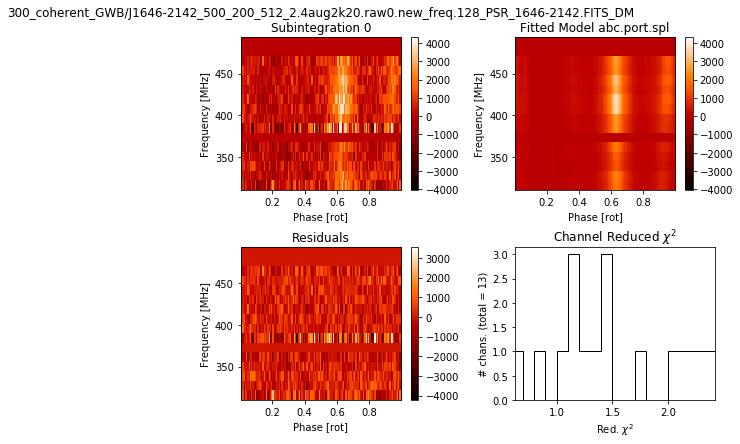


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1646-2142.FITS_DM
~0.0331 sec/TOA
Med. TOA error is 4.450 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [M

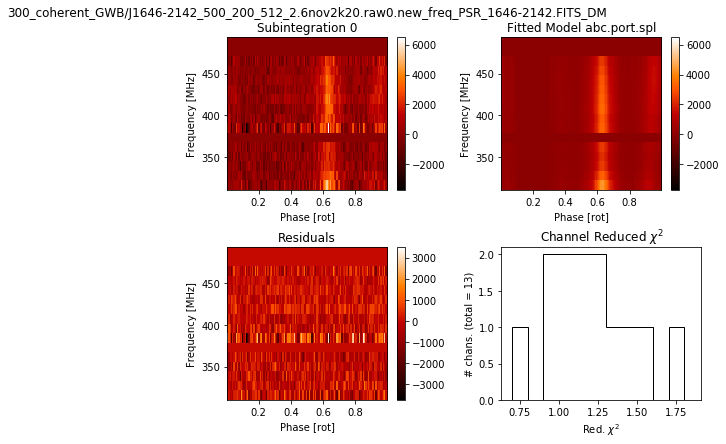


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_DM
~0.0276 sec/TOA
Med. TOA error is 2.985 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [M

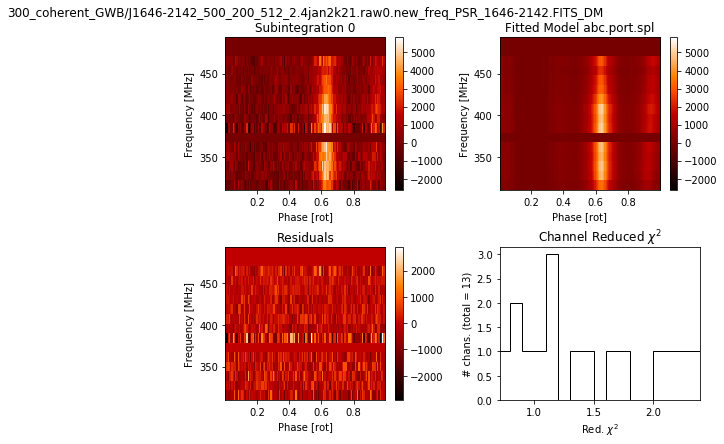


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.8feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2645.36 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.8feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0428 sec/TOA
Med. TOA error is 2.465 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.8feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        

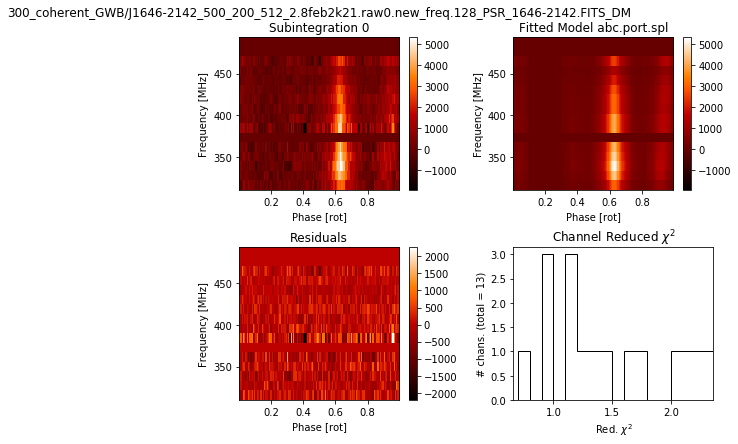


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0360 sec/TOA
Med. TOA error is 3.418 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
     

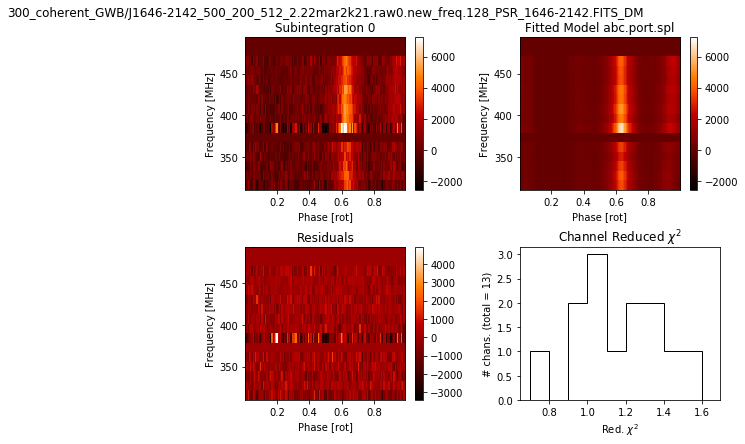


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0326 sec/TOA
Med. TOA error is 1.871 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
     

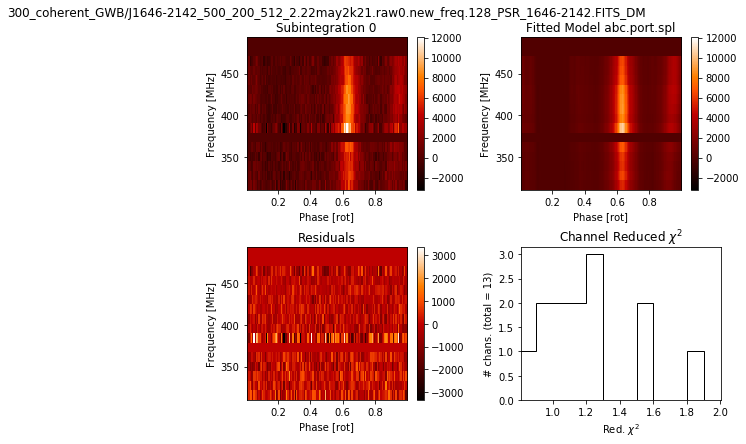


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0126 sec/TOA
Med. TOA error is 5.918 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
     

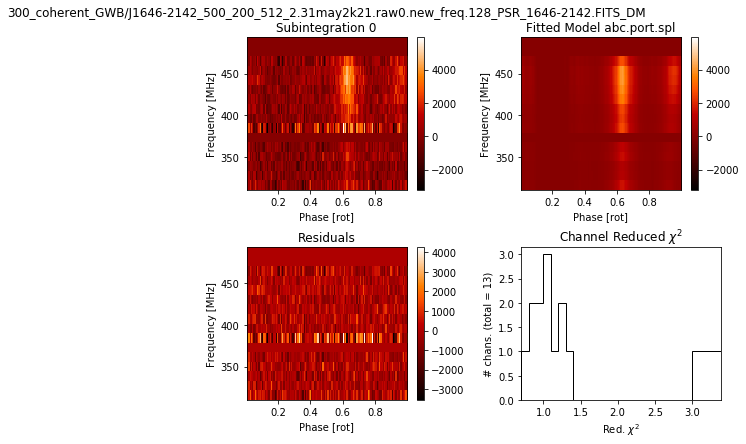


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0123 sec/TOA
Med. TOA error is 3.926 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
     

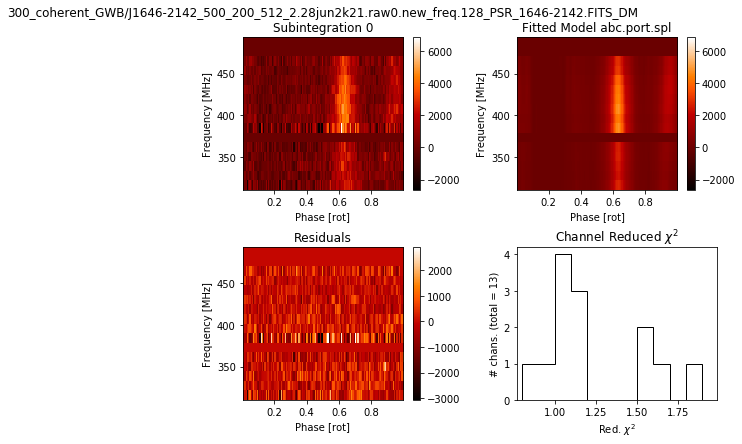


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM
~0.0178 sec/TOA
Med. TOA error is 2.912 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.752000
        center freq. [MHz] = 399.8047
        

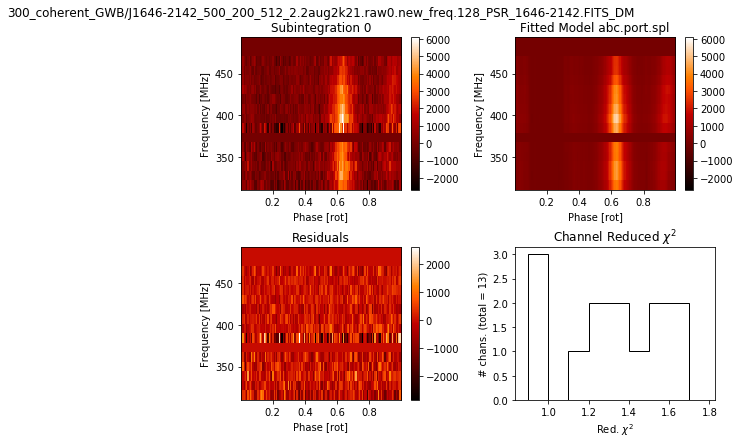

--------------------------
Total time: 0.91 sec, ~0.0455 sec/TOA


In [10]:
import pptoas as ppt
from pplib import write_TOAs
toaprogmeta = "J1646-2142_coherent16.meta"
gt = ppt.GetTOAs(toaprogmeta, J1646_fit_modelfile)
gt.get_TOAs( bary=True, show_plot=True)
#pptoas.py -d "J1646-2142_coherent16.meta" -m "J1646-2142_splinefit.spl" --nu_ref=400

In [11]:
# TOAs produced. Can see number of TOAs produced per epoch as well as median TOA error for
# each epoch.
#gt.show_fit(datafile=None, isub=0)  # datafile=None will just select the first datafile from the metafile
timfile = "29Sep2k21_WB_C_J1646-2142_1eig_1tX16f.tim"
write_TOAs(gt.TOA_list, SNR_cutoff=0.0, outfile=timfile, append=False)

# Writing of TOAs to tim file. Writes in TEMPO format. Can copy paste "freq MJD uncert"
# information into another tim file.

In [12]:
fil = open('29Sep2k21_WB_C_J1646-2142_1eig_1tX16f.tim', 'r')
for line in fil:
    print(line)

300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_DM 371.54225940 58418.248921442031173   3.163  gmrt -pp_dm 29.7536423 -pp_dme 0.0004055 -be  -nchx 13 -tobs 1798.963 -f _ -gof 2.046 -snr 93.144 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J1646-2142_splinefit.spl

300_coherent_GWB/J1646-2142_500_200_512_2.25feb2k19.raw0.new_freq.128_PSR_1646-2142.FITS_DM 381.54241540 58539.227643142683902   2.203  gmrt -pp_dm 29.7585646 -pp_dme 0.0002931 -be  -nchx 13 -tobs 1499.628 -f _ -gof 1.284 -snr 129.270 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J1646-2142_splinefit.spl

300_coherent_GWB/J1646-2142_500_200_512_2.14may2k19.raw0.new_freq_PSR_1646-2142.FITS_DM 370.19858731 58616.910771202410530   2.826  gmrt -pp_dm 29.7535476 -pp_dme 0.0003793 -be  -nchx 13 -tobs 1798.963 -f _ -gof 1.189 -snr 104.572 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J1646-2142